<a href="https://colab.research.google.com/github/LucasSimone/MachineLearningProject/blob/main/Copy_of_MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Set Collection and Problem Formulation**


When we were thinking of well motivated problems machine learning can be applied to, we went to kaggle and started looking at different datasets that we could analyze and make an image recognition network that would benefit the world. While scrolling through datasets we came across a dataset that had x-ray images of lungs with and without pneumonia. There are many conversations going on right now about automation in the radiology and medical field so we found this data set very interesting. This dataset had already been solved many times by various people, but it gave us the idea to look for similar datasets. We started looking for datasets that were made of medical imaging or scans where we could apply what we learned to help identify and diagnose medical conditions. We finally came across this dataset: (https://www.kaggle.com/tourist55/alzheimers-dataset-4-class-of-images). This data set consists of MRI brain scan images concerning brains with Alzheimer’s. The dataset is sorted into 4 categories non demented, very mild demented, mildly demented, and moderate demented. This data set did not have as many answers and we thought we would be able to use the concepts taught in class to implement a good neural network with the goal of identifying a brain with Alzheimer’s and the severity of the case. 
We looked through the data set which already contained a train and test folder. We noticed that each category did not have the same number of images so we would have to keep in mind we are working with an imbalanced dataset. Having all the information we needed about the data we were confident the data was good and that it did not need many changes, so we decided to proceed with this problem.

Once we decided on the dataset, we knew the problem we were solving was to use machine learning and train a network that will correctly identify if a brain had Alzheimer’s and the severity of the case. We started thinking of the best way to create the neural network for this dataset. We decided we were going to use a sequential model with multiple convolutional and max pooling layers. The convolutional layers are used as a filter which highlights the features of an image and creates a feature map. The pooling layer is then used to down sample the feature map taking only activated presence of a feature. We can use multiple of these layers together to make a model that will correctly identify the images once trained. 

#VVV
This cell imports the functionaloity to acess information on a goole drive and mounts the googel drive that contains the dataset

In [ ]:
#Using google drive to store datastets allow access to google drive
from google.colab import drive

#Mount the drive 
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


#VVV
This cell intalls the tensorflow addonns library to the enviroment so it can be imported and used

In [ ]:
!pip install tensorflow_addons

#VVV
These are all the imports for libaries used throughout the code

In [ ]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import keras
import tensorflow as tf
from PIL import Image
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, Activation, MaxPooling2D, Input, BatchNormalization
import tensorflow_addons as tfa

from tensorflow import keras as keras
from keras.preprocessing.image import ImageDataGenerator

#VVV
Setting a variable as the path directory for easy acess and printing the subfolders in the path.


In [ ]:
#Go make file equal to dataset directory
file = '/content/gdrive/My Drive/MLProjectDataSet/Alzheimer/Alzheimer_s Dataset'
# file = '/content/gdrive/MyDrive/MLProjectDataSet/Alzheimer_s Dataset'

#Show sub folders
print(os.listdir(file))

['train', 'test']


#VVV 
More varibale setups for differnt paths the to data categories

In [ ]:
#Import Images from train to see example image
mild = file + '/train/MildDemented' 
moderate = file + '/train/ModerateDemented'
non = file +  '/train/NonDemented'
veryMild = file + '/train/VeryMildDemented'

#VVV
Retreving the first varibale from each category. This is so we can display them to get a better visual understanding of the data were dealing with.

In [ ]:
#Get image from folder
mildIm  = Image.open(mild + "/" + os.listdir(mild)[0])
moderateIm = Image.open(moderate + "/" + os.listdir(moderate)[0])
nonIm = Image.open(non + "/" + os.listdir(non)[0])
veryMildIm = Image.open(veryMild + "/" + os.listdir(veryMild)[0])

#VVV 
Plotting the images using matplotlib.pyplot

(-0.5, 175.5, 207.5, -0.5)

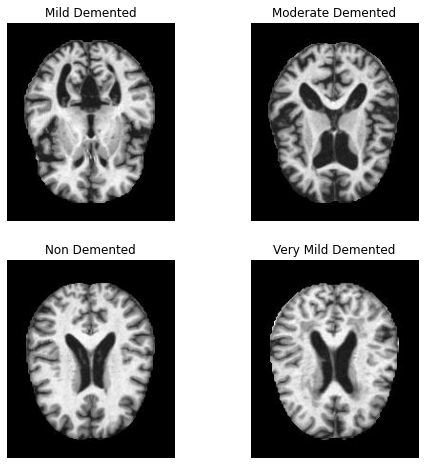

In [ ]:
#Plot First image from each category
fig=plt.figure(figsize=(8, 8))


a = fig.add_subplot(2, 2, 1)
img_plot = plt.imshow(mildIm, cmap='gray')
a.set_title('Mild Demented')
plt.axis('off')

b = fig.add_subplot(2, 2, 2)
img_plot = plt.imshow(moderateIm, cmap='gray')
b.set_title('Moderate Demented')
plt.axis('off')

c = fig.add_subplot(2, 2, 3)
img_plot = plt.imshow(nonIm, cmap='gray')
c.set_title('Non Demented')
plt.axis('off')

d = fig.add_subplot(2, 2, 4)
img_plot = plt.imshow(veryMildIm, cmap='gray')
d.set_title('Very Mild Demented')
plt.axis('off')


#VVV 
Getting the size of the images in the dataset. This is so we can later use it in the program. The size of the image is the input shape for our model

In [ ]:
#Find Size of image
print(mildIm.size)

IMAGE_SIZE = mildIm.size

(176, 208)


#VVV 
Using keras to preprocess the data and import it into our program. It will import it as a tf batchDataset. Setting the batch size to 16. We give it a random number as for seed to shuffle the data. Shuffling the data is important because it makes sure each datapoint has an indepentant effect on the model. If the data is ordered in a specified manner it may have a biased effect on the network due to the data that was used to train before it.

In [ ]:
training_image_set = tf.keras.preprocessing.image_dataset_from_directory(
    file + '/train',
    validation_split=0.2,
    subset="training",
    seed=2532,
    image_size=IMAGE_SIZE,
    batch_size=16
)

test_image_set = tf.keras.preprocessing.image_dataset_from_directory(
    file + '/test',
    validation_split=0.2,
    subset="validation",
    seed=2532,
    image_size=IMAGE_SIZE,
    batch_size=16
)


Found 5122 files belonging to 4 classes.
Using 4098 files for training.
Found 1279 files belonging to 4 classes.
Using 255 files for validation.


#VVV
Setting the names of the classes and assigning them to the data.

In [ ]:
class_names = ['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']
training_image_set.class_names = class_names
test_image_set.class_names = class_names

#VVV
This is the function used for the one hot encoding of our data. The reason we use one hot encoding is because we are dealing with categorical data. One hot encoding the dataset allows the model to understand the differences in categories and use them for image recognition when training.

In [ ]:
#Function to convert our data into onehot encodings
#We do this to make our model understand we are working with categorical data
def one_hot_label(image, label):
    label = tf.one_hot(label, 4)
    return image, label

#VVV
Calling the onehot encoding function to preform the encoding on our data.

In [ ]:
#Covert to One Hot
train_ds = training_image_set.map(one_hot_label, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_ds = test_image_set.map(one_hot_label, num_parallel_calls=tf.data.experimental.AUTOTUNE)

#VVV
This is the cell where we make our model.

We first start off with the input which is the size of the image which we set above. Next there are 2 layers of Convolution with relu activation and 16 output filters. Followed by a max pooling layer to down sample the output of the convolutional layer which takes the maximum value.

We then have more convolutional layers and pooling layers of increasing size. This gives us more parameters for training. 

We also have 2 dropout layers and 4 normalization layers. The dropout layers drop the datapoint if it is below a certain rate. That datapoint does not train the network which helps to prevent overfitting.

We then flatten the input and add 3 dense layers with dropouts and normalizations.

In [ ]:
model = Sequential([
                    
    Input(shape=(*IMAGE_SIZE, 3)),

    Conv2D(16, 3, activation='relu', padding='same'),
    Conv2D(16, 3, activation='relu', padding='same'),

    MaxPool2D(),

    Conv2D(32, 3, activation='relu', padding='same'), 
    Conv2D(32, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(),

    Conv2D(64, 3, activation='relu', padding='same'), 
    Conv2D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(),

    Conv2D(128, 3, activation='relu', padding='same'), 
    Conv2D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(),

    Dropout(0.2),

    Conv2D(256, 3, activation='relu', padding='same'), 
    Conv2D(256, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(),


    Dropout(0.2),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.7), 

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),


    Dense(4, activation='softmax')        
], name = "cnn_model")


model.summary()

Model: "cnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 176, 208, 16)      448       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 176, 208, 16)      2320      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 88, 104, 16)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 88, 104, 32)       4640      
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 88, 104, 32)       9248      
_________________________________________________________________
batch_normalization_28 (Batc (None, 88, 104, 32)       128       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 44, 52, 32)        0 

#VVV 
This cell compiles the model we made above and sets the metrics we will use for accuracy when training the model.

In [ ]:
METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc'), 
           tfa.metrics.F1Score(num_classes=4)]
    
model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=METRICS)

#VVV 
This cell contains the a custom callback. This callback is used to stop the training early should we reach our target accuracy before the last epoch.

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('auc') > 0.99:
            print("\nReached desired accuracy. Training complete")
            self.model.stop_training = True

#VVV
This cell uses the .fit function to train the model. We train using 100 epochs and store the retrun data in history.

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    callbacks=[MyCallback()],
    epochs=100
)

Epoch 1/100
257/257 [==============================] - 13s 42ms/step - loss: 1.4478 - acc: 0.4190 - auc: 0.6726 - f1_score: 0.2903 - val_loss: 1.1197 - val_acc: 0.5373 - val_auc: 0.8076 - val_f1_score: 0.2841
Epoch 2/100
257/257 [==============================] - 11s 42ms/step - loss: 1.1285 - acc: 0.4946 - auc: 0.7718 - f1_score: 0.2953 - val_loss: 1.0739 - val_acc: 0.5804 - val_auc: 0.8316 - val_f1_score: 0.2919
Epoch 3/100
257/257 [==============================] - 11s 44ms/step - loss: 1.0201 - acc: 0.5307 - auc: 0.8100 - f1_score: 0.3087 - val_loss: 2.7981 - val_acc: 0.5765 - val_auc: 0.8159 - val_f1_score: 0.2056
Epoch 4/100
257/257 [==============================] - 11s 43ms/step - loss: 1.0113 - acc: 0.5434 - auc: 0.8131 - f1_score: 0.2961 - val_loss: 0.9449 - val_acc: 0.5333 - val_auc: 0.8329 - val_f1_score: 0.2833
Epoch 5/100
257/257 [==============================] - 11s 42ms/step - loss: 0.9474 - acc: 0.5542 - auc: 0.8312 - f1_score: 0.3262 - val_loss: 2.7252 - val_acc: 0.2

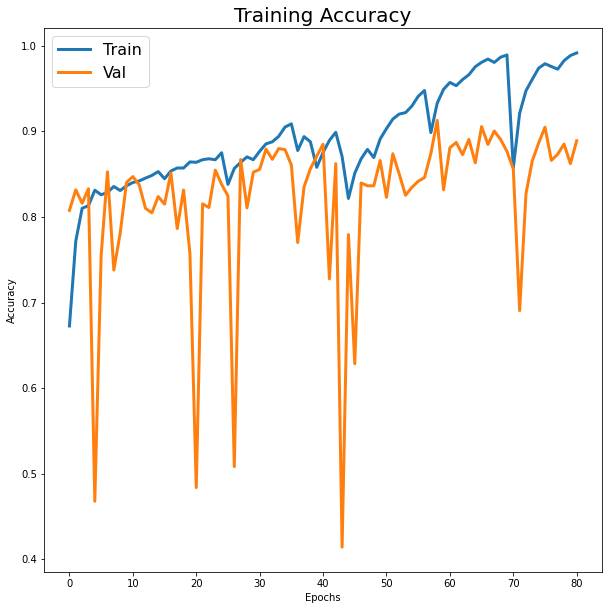

In [ ]:
#Plotting the trend of the metrics during training

plt.figure(figsize=(10, 10))
plt.plot(history.history["auc"], linewidth=3);
plt.plot(history.history["val_auc"], linewidth=3);

plt.legend(['Train', 'Val'], fontsize=16)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title('Training Accuracy', fontsize=20);

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    file + "/test",
    image_size=IMAGE_SIZE,
    batch_size=16,
)

test_ds = test_ds.map(one_hot_label, num_parallel_calls=tf.data.experimental.AUTOTUNE)

Found 1279 files belonging to 4 classes.


In [ ]:
_ = model.evaluate(test_ds)

80/80 [==============================] - 3s 37ms/step - loss: 1.0529 - acc: 0.6654 - auc: 0.8824 - f1_score: 0.4718
